In [ ]:
#importing the necessary modules
from keras.datasets import mnist
import numpy as np

In [ ]:
#loading data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


Training data:


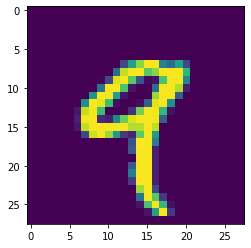

Label of this image is 9


In [ ]:
#What mnist images look like
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[4])
plt.show()
print("Label of this image is",ytrain[4])

In [ ]:
#reshaping data as needed by the model
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [ ]:
#normalising
xtrain=xtrain/255
xtest=xtest/255

In [ ]:
#implementing one hot encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(ytrain, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)

In [ ]:
#importing the model
from keras.models import Sequential

In [ ]:
#creating model object
model=Sequential()

In [ ]:
#importing layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
#adding layers and forming the model
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))

In [ ]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
#training the model
model.fit(xtrain,y_train,batch_size=100,epochs=5,validation_data=(xtest,y_test))

Epoch 1/5
600/600 [==============================] - 12s 6ms/step - loss: 0.1287 - accuracy: 0.9598 - val_loss: 0.0425 - val_accuracy: 0.9860
Epoch 2/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0378 - accuracy: 0.9877 - val_loss: 0.0297 - val_accuracy: 0.9906
Epoch 3/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0255 - accuracy: 0.9922 - val_loss: 0.0277 - val_accuracy: 0.9901
Epoch 4/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0194 - accuracy: 0.9935 - val_loss: 0.0284 - val_accuracy: 0.9910
Epoch 5/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.0296 - val_accuracy: 0.9913


In [ ]:
#model train and test scores
model.evaluate(xtrain,y_train),model.evaluate(xtest,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0296 - accuracy: 0.9913


([0.011272789910435677, 0.9961333274841309],
 [0.02955915778875351, 0.9912999868392944])

In [ ]:
model.save("CNN_MNIST.h5")